In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Excelr/Assignments/DataSets/ToyotaCorolla - MLR.csv")

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [9]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [10]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

In [11]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,0,86,0,1300,3,4,5,1025
1432,10845,72,19000,0,86,0,1300,3,4,5,1015
1433,8500,71,17016,0,86,0,1300,3,4,5,1015
1434,7250,70,16916,0,86,0,1300,3,4,5,1015


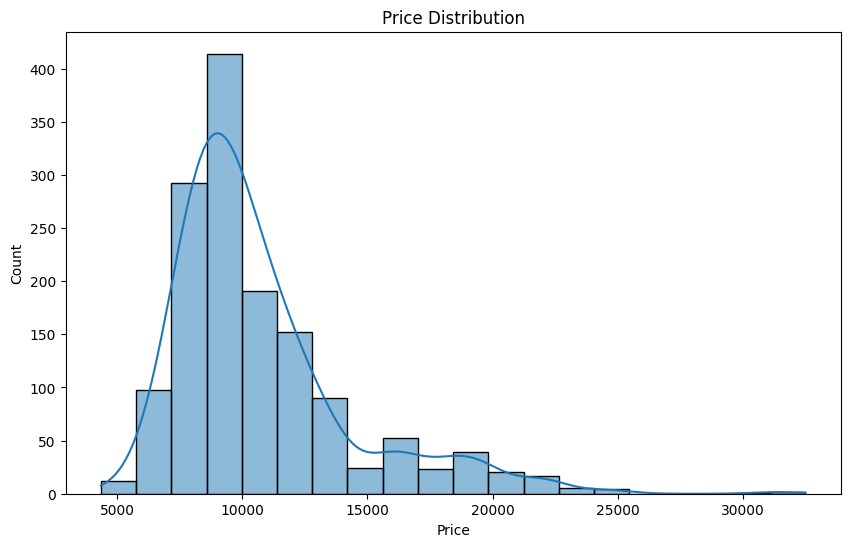

In [14]:
# Visualizations
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

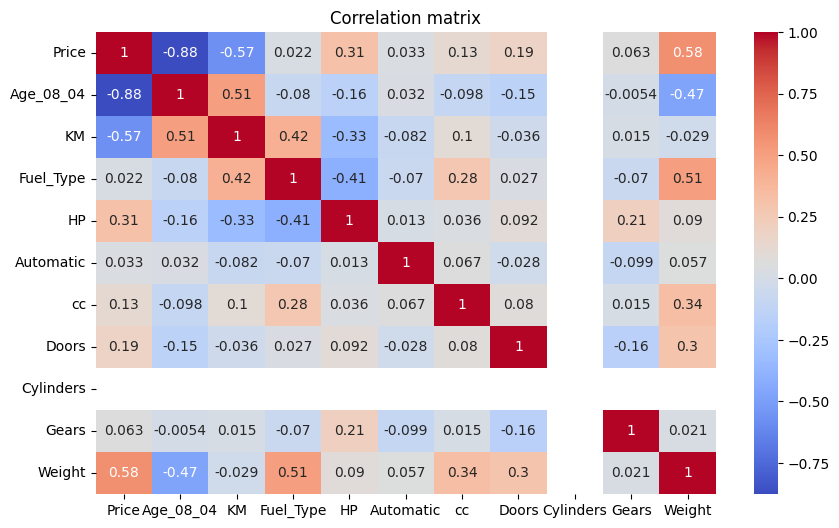

In [15]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [16]:
# Prepare data
X = df.drop('Price', axis=1)
y = df['Price']

In [17]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Model 1: Multiple Linear Regression with all features
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [20]:
print("Model 1: Multiple Linear Regression")
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Model 1: Multiple Linear Regression
Coefficients: [-2.25792605e+03 -6.34972882e+02 -3.20204724e+02  3.09375607e+02
  5.62387109e+01 -3.11880931e+01 -3.45507351e+01  5.68434189e-14
  9.99288903e+01  1.23719557e+03]
Intercept: 10747.642331512392
MSE: 2096851.1400177027
R2 Score: 0.8428476112018003


In [21]:
# Model 2: Using subset of features (Age_08_04, KM, HP, Weight, cc)
# 'Age_08_04' = 0, 'KM' = 1, 'HP' = 3, 'Weight' = 9, 'cc' = 5
feature_indices = [0, 1, 3, 9, 5]
X_train_sub = X_train[:, feature_indices]
X_test_sub = X_test[:, feature_indices]

In [22]:
lr_sub = LinearRegression()
lr_sub.fit(X_train_sub, y_train)
y_pred_sub = lr_sub.predict(X_test_sub)

In [23]:
print("\nModel 2: Linear Regression with subset of features")
print("Coefficients:", lr_sub.coef_)
print("Intercept:", lr_sub.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred_sub))
print("R2 Score:", r2_score(y_test, y_pred_sub))


Model 2: Linear Regression with subset of features
Coefficients: [-2230.71709684  -753.82928553   437.21976275  1056.89624844
   -42.7464859 ]
Intercept: 10743.959687927087
MSE: 1995964.8372853647
R2 Score: 0.8504087218447196


In [24]:
# Model 3: Lasso and Ridge Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [26]:
print("\nModel 3: Lasso Regression")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R2 Score:", r2_score(y_test, lasso_pred))



Model 3: Lasso Regression
Coefficients: [-2257.90072419  -634.98507523  -320.02373337   309.36488397
    56.15433653   -31.06755876   -34.3979671      0.
    99.87083307  1236.91463722]
Intercept: 10747.638384049638
MSE: 2096720.6573912082
R2 Score: 0.842857390463694


In [27]:
print("\nModel 3: Ridge Regression")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))


Model 3: Ridge Regression
Coefficients: [-2255.66848607  -636.19253185  -318.65974041   309.68559642
    56.19704067   -30.91655628   -33.97742342     0.
   100.00949413  1235.97151218]
Intercept: 10747.633549400638
MSE: 2096073.7388943164
R2 Score: 0.8429058749675311


### 1. What is Normalization & Standardization and how is it helpful?


**Normalization**  
- Also called *Min-Max Scaling*.  
- Rescales values of a feature to a fixed range, usually **[0,1]**.  
- Formula:  
  \[
  X' = \frac{X - X_{min}}{X_{max} - X_{min}}
  \]  
- Useful when:  
  - Features have different scales (e.g., age in years vs. kilometers in thousands).  
  - Models that rely on distance or gradient-based optimization (e.g., **KNN, Neural Networks**) perform better if features are within the same range.  

**Standardization**  
- Also called *Z-score normalization*.  
- Transforms data so that it has **mean = 0** and **standard deviation = 1**.  
- Formula:  
  \[
  X' = \frac{X - \mu}{\sigma}
  \]  
- Useful when:  
  - Features have different units/scales.  
  - Algorithms assume normally distributed data or are sensitive to scale (e.g., **Linear Regression, Logistic Regression, PCA, Ridge/Lasso**).  

**How it helps**  
- Prevents features with larger ranges from dominating model training.  
- Speeds up gradient descent convergence.  
- Improves interpretability of coefficients in regression.  


### 2. What techniques can be used to address multicollinearity in multiple linear regression?




**Multicollinearity** = when two or more predictors are highly correlated, making it difficult to estimate coefficients reliably.  

**Techniques to address it:**  

1. **Detect using VIF (Variance Inflation Factor):**  
   - VIF > 10 usually indicates multicollinearity.  
   - Drop or combine features with high VIF.  

2. **Feature Selection:**  
   - Remove redundant variables.  
   - Use domain knowledge to pick the most meaningful predictor.  

3. **Combine correlated features:**  
   - Example: If `KM` and `Age` are correlated, create a derived feature like `KM per year`.  

4. **Regularization Methods:**  
   - **Ridge Regression**: shrinks coefficients, reduces variance but keeps all variables.  
   - **Lasso Regression**: shrinks and can force coefficients to zero, effectively selecting features.  

5. **Dimensionality Reduction:**  
   - Use **PCA (Principal Component Analysis)** or **PLS (Partial Least Squares)** to transform correlated features into uncorrelated components.  